## Домашнее задание 1.
Кондитерская снабжает фирменным печеньем несколько магазинов. Менеджер кондитерской должен определить количество печенья выпекаемого каждый день. Менеджер ставит перед вами задачу по поиску оптимального количества печенек.

Из анализа накопившихся данных он оценивает спрос на печенье в среднем в 2500 упаковок по дюжине печений в день и стандартном отклонении спроса около 500 упаковок, также предпологается, логонормальное распределение спроса.

Каждая упаковка продается за 50 рублей, а стоит изготовителю 30 руб., что включает обработку и перевозку. Печенье, которое не удалось передать в магазины до конца дня, уценивается до 15 руб. и по этой цене целиком продается на следующий день как учененный товар.

какова при этом будет средняя и медианная величина прибыли?
сколько печенья Вы посоветуете печь ежедневно (ваш оптимальный заказ)?
очевидно, что фирма несет издержки и в случае, если возник дефицит печенья, и в случае, если некоторая часть печенья осталась не раскупленной. Какую сумму в среднем фирма теряет на избытке и на недостатке печенья при оптимальном заказе?
как изменятся ответы на вопросы 1, 2 и 3, если стандартное отклонение увеличится до 1000 упаковок?

## Импорт библиотек

In [292]:
import numpy as np
import matplotlib.pyplot as plt


## Начальные данные

In [293]:
m = 2500  # мат ожидание спроса
std = 500 # cреднее квадратичное отклонение спроса
price = 50  #  цена за одну упаковку
mc = 30   # издержки от одной упаковки

discounted_price = 15 #  цена на след.день, если в тот не продалось

## Прибыль

создадим функцию высчитывания прибыли

In [294]:
def profit_func(supply,price,mc,discounted_price,demand):
    profit=np.where(supply >= demand, price*demand-mc*supply+ discounted_price*(supply-demand) , (price-mc)*supply)
    return profit

## Спрос

В логнормальном распределении берутся параметры не мат ожидания и среднего квадратичного отклонения.
Найдем параметры, благодаря которым получим нужные мат ожидание и среднее квадратичное отклонение

In [295]:
sigma = np.sqrt( np.log( (std**2+m**2)/m**2 ) ) # сигма в распределении
mean = np.log(m) - (sigma**2)/2  #mю в распределении

In [296]:
n=10000 #мультивселеенные # чем больше, тем точнее результат. взяла такое, так как грузить с большим числом будет дольше

запишем спрос и преоброзуем в целочисленный

In [297]:
demand=np.random.lognormal(mean, sigma, n).astype (int)


## Границы перебора для предложения

Чтобы найти оптимальные пределы перебора для предложения, построим гистограмму спроса

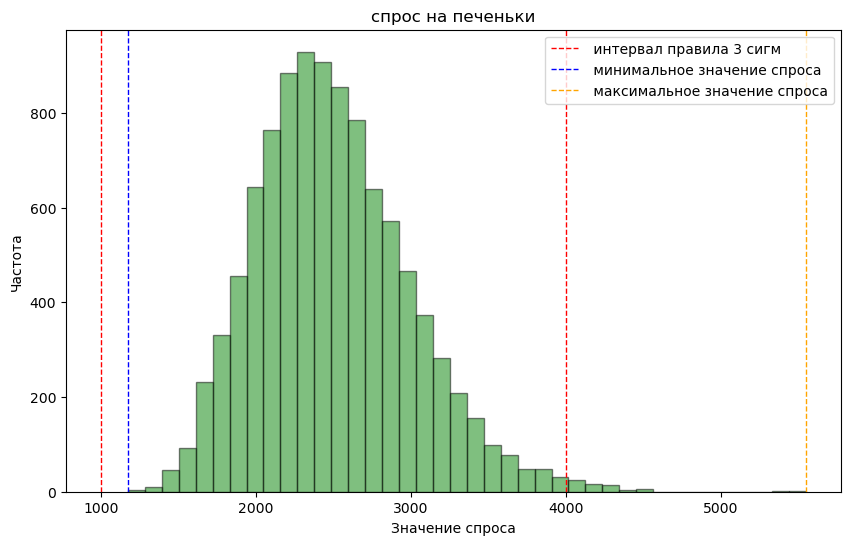

In [298]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.axvline(-3*std+ m,linestyle='--', color="r", label=" интервал правила 3 сигм", linewidth=1)
ax.axvline(3*std +m, linestyle='--', color="r",  linewidth=1)
ax.axvline((demand).min(), linestyle='--', color="b", label=" минимальное значение спроса",  linewidth=1)
ax.axvline((demand).max(), linestyle='--', color="orange", label=" максимальное значение спроса",  linewidth=1)

ax.hist(demand, bins = 40,alpha=0.5, ec='k', color='g')
ax.set_xlabel("Значение спроса")
ax.set_ylabel("Частота")
ax.legend(loc='upper right',fontsize=10)
ax.set_title('спрос на печеньки')
plt.show()

правило 3 сигм охватывает большой диапазон и включает в себя наиболее частые значения спроса, значит, точность вычислений будет велика. Будем использовать данное правило с целью оптимизации кода. При этом можно заметить, что левая граница иногда меньше минимума, поэтому можно упростить и выбрать минимальное значение из двух. 


создаем массив значений возможных выпусков

In [299]:

supply=np.arange(np.maximum(demand.min(),m-3*std),m+3*std +1)


## Определение средней и медианной величин прибыли и оптимального предложения

##### для наглядности сначала построю гистограмму прибыли при фиксированном предложение ( предположим 2500) и покажу медианную и среднюю на ней

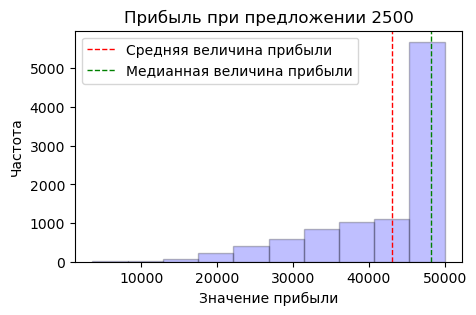

Средняя величина прибыли = 43099.477
Медианная величина прибыли = 48215.0


In [300]:
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(1, 1, 1)
profit_2500=profit_func(2500,price,mc,discounted_price,demand)
profit_mean_2500= np.mean(profit_2500)
profit_median_2500=np.median(profit_2500)
ax.hist(profit_2500,alpha=0.25, ec='k', color='b')
ax.set_title('Прибыль при предложении 2500')

ax.set_xlabel("Значение прибыли")
ax.set_ylabel("Частота")


ax.axvline(profit_mean_2500,linestyle='--', color="r", label="Средняя величина прибыли", linewidth=1)
ax.axvline(profit_median_2500,linestyle='--', color="g", label="Медианная величина прибыли", linewidth=1)
ax.legend(loc='upper left',fontsize=10)
plt.show()
print("Средняя величина прибыли =", profit_mean_2500)
print("Медианная величина прибыли =", profit_median_2500)

##### Найдем среднюю и медианную величины прибыли в целом по задаче и построим графики зависимости средней прибыли от предложения и медианной прибыли от предложения

теперь для каждого предложения ищем среднее и медианное значение прибыли

In [301]:
def parametrs_profit(supply):
    
    profit_mean=np.zeros(len(supply))
    profit_median=np.zeros(len(supply))
    for i,potential_supply in enumerate(supply):
        profit_mean[i]= np.mean(profit_func(potential_supply,price,mc,discounted_price,demand))
        profit_median[i]= np.median(profit_func(potential_supply,price,mc,discounted_price,demand))
    return np.array([profit_mean,profit_median])
#нашли элементы массивов profit_mean и profit_median


построим графики зависимости средней прибыли от предложения и медианной прибыли от предложения. Отоброзим на графиках среднее значение найденных значений. Найдем и отметим оптимальное предложение

30456


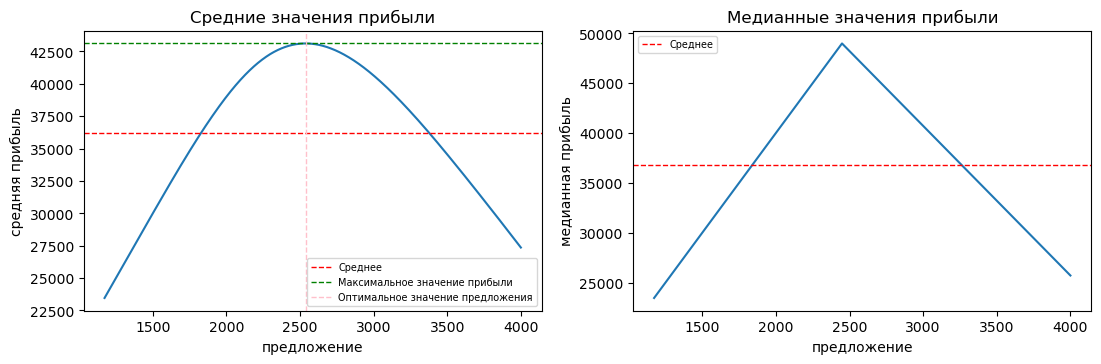

In [302]:
profit_par= parametrs_profit(supply)
profit_mean=profit_par[0]
profit_median= profit_par[1]

fig = plt.figure(figsize=(13, 8))
ax1 = fig.add_subplot(2, 2, 1) 
ax2 = fig.add_subplot(2, 2, 2) 
ax1.plot(supply, profit_mean)
ax1.set_title('Средние значения прибыли')
ax1.set_xlabel("предложение")
ax1.set_ylabel("средняя прибыль")
ax2.plot(supply, profit_median)
ax2.set_xlabel("предложение")
ax2.set_ylabel("медианная прибыль")
ax2.set_title('Медианные значения прибыли')

profit_mean_all=np.mean(profit_mean) # ответ на 1 вопрос (средняя величина прибыли в целом)
profit_median_all=np.mean(profit_median) # ответ на 1 вопрос (средняя медианная величина прибыли)

ax1.axhline(profit_mean_all,linestyle='--', color="r", label="Среднее", linewidth=1)
ax2.axhline(profit_median_all,linestyle='--', color="r", label="Среднее", linewidth=1)
ax1.axhline((profit_mean).max(),linestyle='--', color="g", label="Максимальное значение прибыли", linewidth=1)

# фирма максимизирует свою прибыль, следовательно, оптимальное предложение - это то предложение, при котором прибыль фирмы максимальная
profit_mean_max_index=np.argmax(profit_mean)  
opt_supply=supply[profit_mean_max_index]   # оптимальное предложение  
opt_supply_cookies= opt_supply*12 # ответ на 2 вопрос
print(opt_supply_cookies)

ax1.axvline(opt_supply,linestyle='--', color="pink", label="Оптимальное значение предложения", linewidth=1)
ax1.legend(loc='lower right',fontsize=7)
ax2.legend(loc='upper left',fontsize=7)


plt.show()

## Поиск срeднего количества потерь при оптимальном предложении

функция для поиска потерь

In [303]:
def losses_func(supply,demand,price,discounted_price,mc):
    losses=np.where(supply >= demand, (price-discounted_price)*(supply-demand) , (price-mc)*(demand-supply))
    return losses
    

потери при оптимальном предложении

In [304]:
losses_mean_opt=np.mean(losses_func(opt_supply,demand,price,discounted_price,mc))
print(losses_mean_opt)  #ответ на 3 вопрос

11196.863


гистограмма

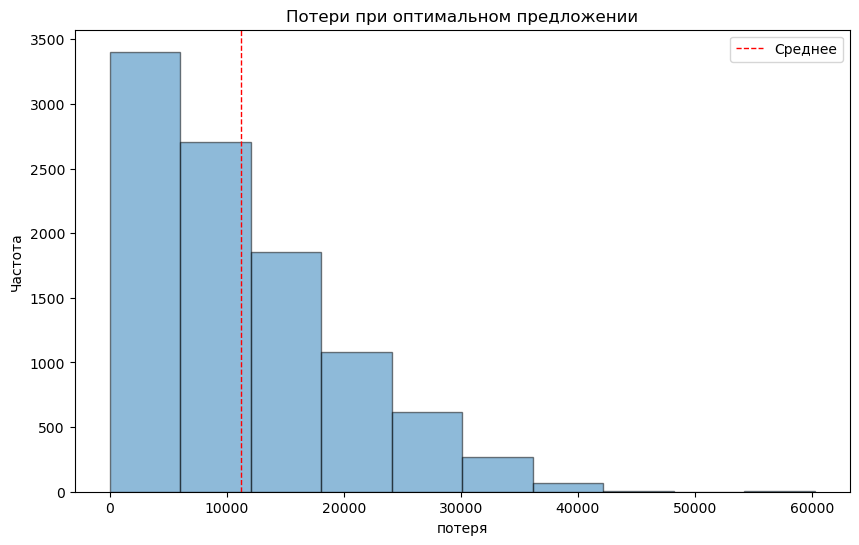

In [305]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.hist(losses_func(opt_supply,demand,price,discounted_price,mc),alpha=0.5,ec='k')
ax.axvline(losses_mean_opt,linestyle='--', color="r", label="Среднее", linewidth=1)
ax.set_title("Потери при оптимальном предложении")
ax.set_xlabel("потеря")
ax.set_ylabel("Частота")
ax.legend(loc='upper right',fontsize=10)
plt.show()


## Итог для стандартного отклонения спроса 500

In [306]:
print(f"1. Средняя величина прибыли : {profit_mean_all} \n" \
      f"   Медианная величина прибыли : {profit_median_all} " )
print('2. Оптимальный выпуск печенья :', opt_supply_cookies ,'( оптимальное количество упаковок :',opt_supply,')')
print('3. Потери при оптимальном заказе', losses_mean_opt )

1. Средняя величина прибыли : 36233.291310643566 
   Медианная величина прибыли : 36834.25742574257 
2. Оптимальный выпуск печенья : 30456 ( оптимальное количество упаковок : 2538 )
3. Потери при оптимальном заказе 11196.863


## Если отклонение равно 1000

In [307]:
std=1000

sigma = np.sqrt( np.log( (std**2+m**2)/m**2 ) ) # сигма в распределении
mean = np.log(m) - (sigma**2)/2  #mю в распределении

n=10000

demand=np.random.lognormal(mean, sigma, n).astype (int)

supply=np.arange(np.maximum(demand.min(),m-3*std),m+3*std +1)

profit_par= parametrs_profit(supply)
profit_mean=profit_par[0]
profit_median= profit_par[1]
profit_mean_all=np.mean(profit_mean) # ответ на 1 вопрос
profit_median_all=np.mean(profit_median) # ответ на 1 вопрос


profit_mean_max_index= np.argmax(profit_mean)  
opt_supply=supply[profit_mean_max_index]   # оптимальное предложение  
opt_supply_cookies= opt_supply*12 # ответ на 2 вопрос
print(opt_supply_cookies)

losses_mean_opt=np.mean(losses_func(opt_supply,demand,price,discounted_price,mc))
print(losses_mean_opt)  #ответ на 3 вопрос




29964
20849.631


##### визуализация

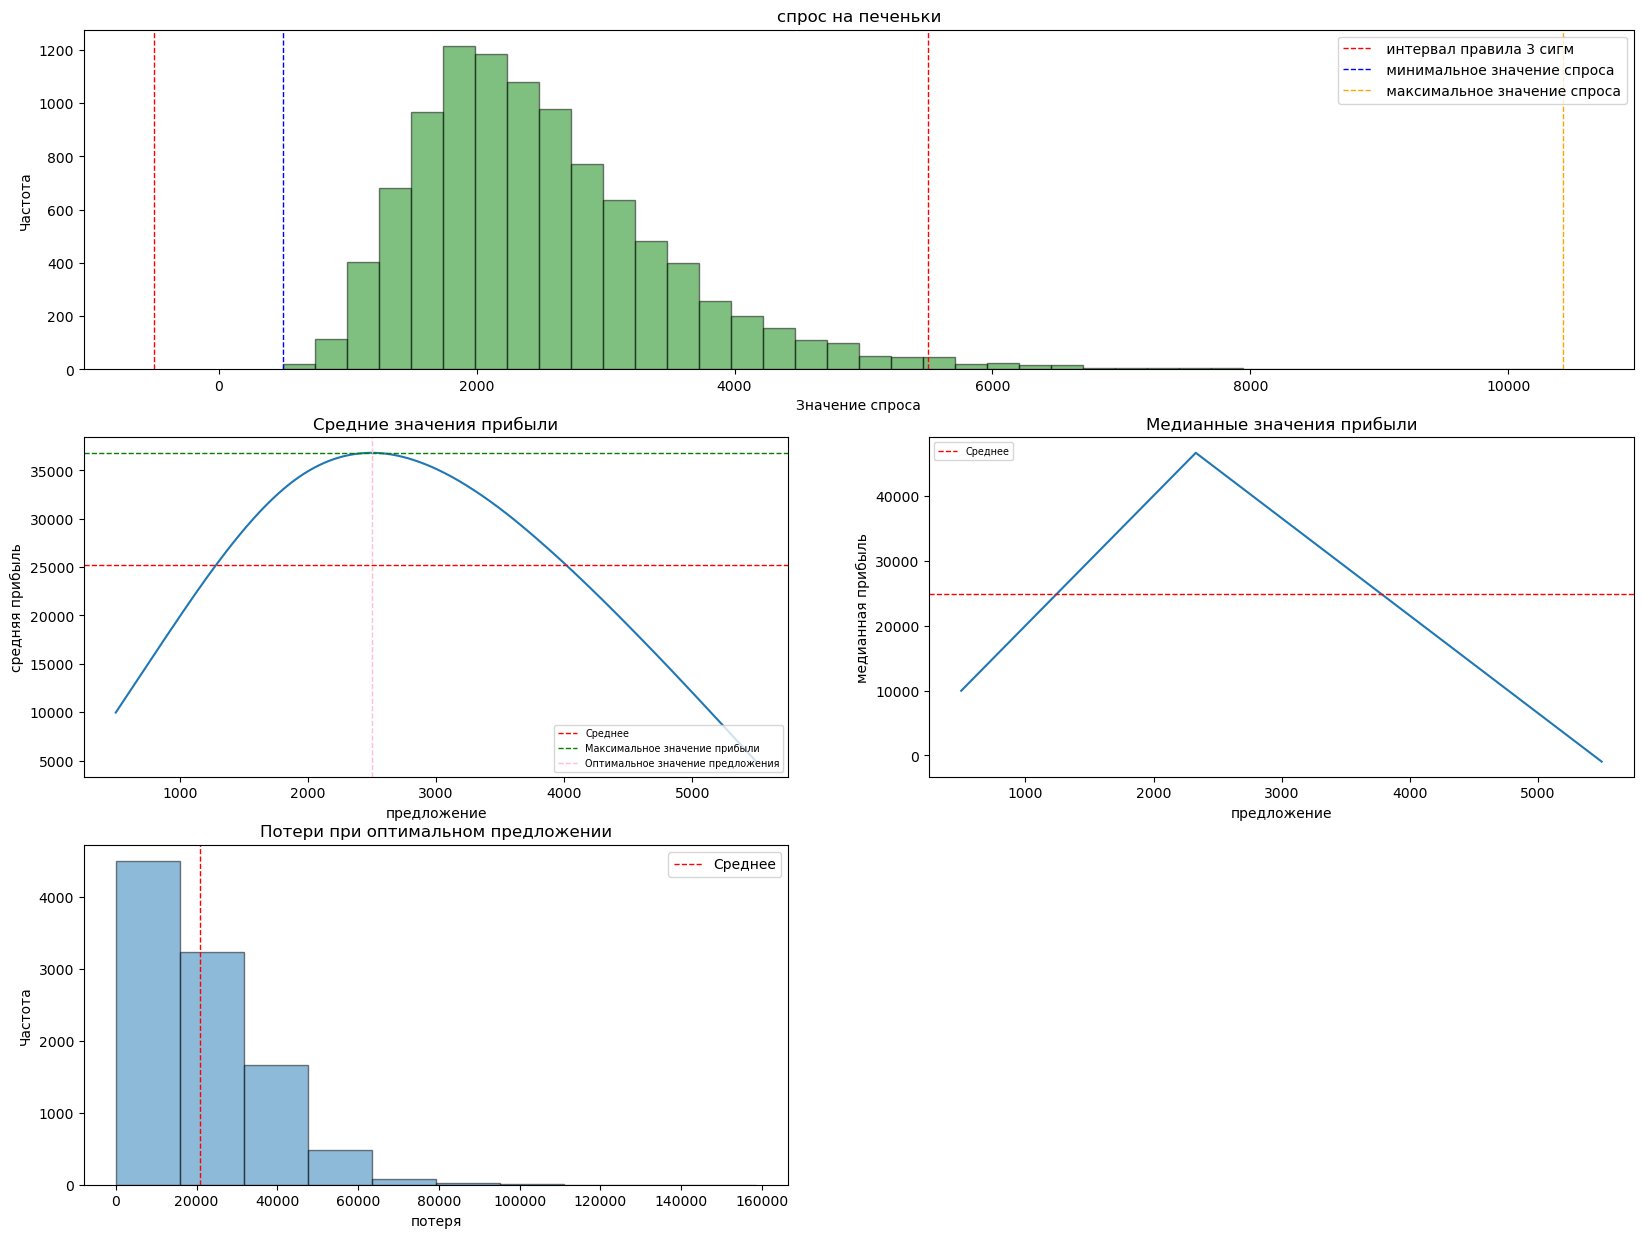

In [308]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(3, 1, 1)
ax.axvline(-3*std+ m,linestyle='--', color="r", label=" интервал правила 3 сигм", linewidth=1)
ax.axvline(3*std +m, linestyle='--', color="r",  linewidth=1)
ax.axvline((demand).min(), linestyle='--', color="b", label=" минимальное значение спроса",  linewidth=1)
ax.axvline((demand).max(), linestyle='--', color="orange", label=" максимальное значение спроса",  linewidth=1)
ax.hist(demand, bins = 40,alpha=0.5, ec='k', color='g')
ax.set_xlabel("Значение спроса")
ax.set_ylabel("Частота")
ax.legend(loc='upper right',fontsize=10)
ax.set_title('спрос на печеньки')
ax1 = fig.add_subplot(3, 2, 3) 
ax2 = fig.add_subplot(3, 2, 4) 
ax1.plot(supply, profit_mean)
ax1.set_title('Средние значения прибыли')
ax1.set_xlabel("предложение")
ax1.set_ylabel("средняя прибыль")
ax2.plot(supply, profit_median)
ax2.set_xlabel("предложение")
ax2.set_ylabel("медианная прибыль")
ax2.set_title('Медианные значения прибыли')
ax1.axhline(profit_mean_all,linestyle='--', color="r", label="Среднее", linewidth=1)
ax2.axhline(profit_median_all,linestyle='--', color="r", label="Среднее", linewidth=1)
ax1.axhline((profit_mean).max(),linestyle='--', color="g", label="Максимальное значение прибыли", linewidth=1)
ax1.axvline(opt_supply,linestyle='--', color="pink", label="Оптимальное значение предложения", linewidth=1)
ax1.legend(loc='lower right',fontsize=7)
ax2.legend(loc='upper left',fontsize=7)
ax3 = fig.add_subplot(3, 2, 5)
ax3.hist(losses_func(opt_supply,demand,price,discounted_price,mc),alpha=0.5,ec='k')
ax3.axvline(losses_mean_opt,linestyle='--', color="r", label="Среднее", linewidth=1)
ax3.set_title("Потери при оптимальном предложении")
ax3.set_xlabel("потеря")
ax3.set_ylabel("Частота")
ax3.legend(loc='upper right',fontsize=10)

plt.show()

## Итог для стандартного отклонения спроса 1000

In [309]:
print(f"1. Средняя величина прибыли : {profit_mean_all} \n" \
      f"   Медианная величина прибыли : {profit_median_all} " )
print('2. Оптимальный выпуск печенья :', opt_supply_cookies, '( оптимальное количество упаковок :',opt_supply,')')
print('3. Потери при оптимальном заказе', losses_mean_opt )

1. Средняя величина прибыли : 25195.60008884669 
   Медианная величина прибыли : 24818.851688986608 
2. Оптимальный выпуск печенья : 29964 ( оптимальное количество упаковок : 2497 )
3. Потери при оптимальном заказе 20849.631
